In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.stats.mstats import gmean
import math
import enum
import pylab 
import scipy.stats as stats

In [ ]:
pip install --upgrade xlrd;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
core_POJ = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-MPG-40D-BA/Core 7-MGP-40D-BA POJ.xlsx"
core_POJ = pd.read_excel(core_POJ)
registro_7MPG ="/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-MPG-40D-BA/Log P 7-JND-3D-BA AG.xlsx"
registro_7MPG = pd.read_excel(registro_7MPG)

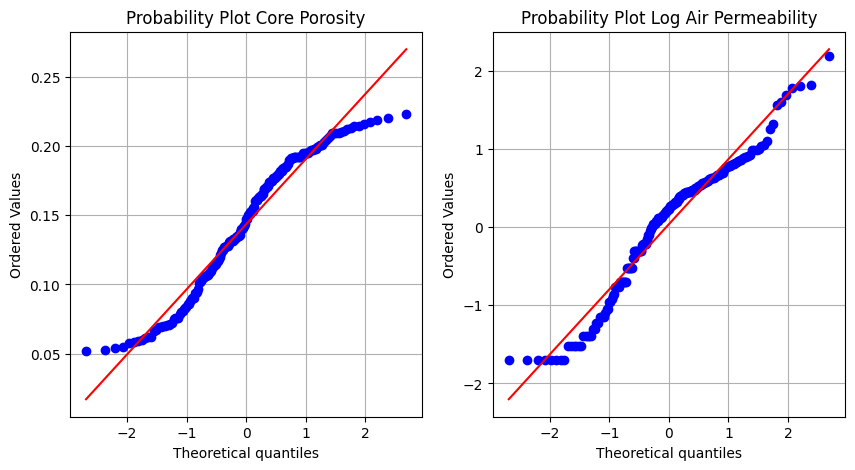

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
stats.probplot(core_POJ["Poro_Core"], dist="norm", plot=pylab)
plt.title("Probability Plot Core Porosity")
plt.subplot(1,2,1).grid()

plt.subplot(1,2,2)
stats.probplot(np.log10(core_POJ["Kh_mD"]), dist="norm", plot=pylab)
plt.title("Probability Plot Log Air Permeability")
plt.subplot(1,2,2).grid()
pylab.show()

In [ ]:
core_POJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DIRECAO AMOSTRA    194 non-null    object 
 1   MD                 194 non-null    float64
 2   Poro_Core          194 non-null    float64
 3   Gran_Density_g/cc  194 non-null    float64
 4   Kh_mD              194 non-null    float64
 5   RQI                194 non-null    float64
 6   Poro_norm          194 non-null    float64
 7   FZI                194 non-null    float64
dtypes: float64(7), object(1)
memory usage: 12.2+ KB


In [ ]:
core_POJ.describe()

,MD,Poro_Core,Gran_Density_g/cc,Kh_mD,RQI,Poro_norm,FZI
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,1972.000103,0.143465,2.700361,4.957113,0.134497,0.171047,0.965642
std,31.181889,0.047549,0.037532,14.449285,0.146608,0.064392,1.301727
min,1921.000000,0.052000,2.620000,0.020000,0.014295,0.054852,0.105978
25%,1948.642500,0.106225,2.680000,0.300000,0.049269,0.118850,0.283053
50%,1968.475000,0.147000,2.690000,1.700000,0.108482,0.172333,0.517748
75%,2001.242500,0.185000,2.720000,4.057500,0.164623,0.226994,0.957626
max,2034.000000,0.223000,2.790000,156.600000,1.206904,0.287001,10.178980


In [ ]:
registro_7MPG = registro_7MPG[(1920<=registro_7MPG["MD"]) & (registro_7MPG["MD"]<=2035)]

In [ ]:
registro_7MPG["MD"] = registro_7MPG["MD"].round(decimals=2)

In [ ]:
Well_7MGP = pd.merge(core_POJ,registro_7MPG,how="outer",on="MD")
Well_7MGP = Well_7MGP.sort_values(by="MD")
Well_7MGP.reset_index(inplace=True,drop=True)

In [ ]:
GR = list(Well_7MGP["GR"])
BS = list(Well_7MGP["BS"])
CALI = list(Well_7MGP["CALI"])
RT = list(Well_7MGP["RT"])
RHOB = list(Well_7MGP["RHOB"])
NPHI = list(Well_7MGP["NPHI"])
DPHI = list(Well_7MGP["DPHI"])
PEF = list(Well_7MGP["PEF"])
SPHI = list(Well_7MGP["SPHI"])
DT = list(Well_7MGP["DT"])
DRHO = list(Well_7MGP["DRHO"])
Vshlin = list(Well_7MGP["Vshlin"])
PHIEn = list(Well_7MGP["PHIEn"])
PHIEd = list(Well_7MGP["PHIEd"])

In [ ]:
for i in range(0,len(GR)):
    if math.isnan(GR[i]):
        GR[i] = gmean([GR[i-1],GR[i+1]])
        if math.isnan(GR[i+1]):
            GR[i] = gmean([GR[i-1],GR[i+2]])

for i in range(0,len(BS)):
    if math.isnan(BS[i]):
        BS[i] = gmean([BS[i-1],BS[i+1]])
        if math.isnan(BS[i+1]):
            BS[i] = gmean([BS[i-1],BS[i+2]])

for i in range(0,len(CALI)):
    if math.isnan(CALI[i]):
        CALI[i] = gmean([CALI[i-1],CALI[i+1]])
        if math.isnan(CALI[i+1]):
            CALI[i] = gmean([CALI[i-1],CALI[i+2]])

for i in range(0,len(RT)):
    if math.isnan(RT[i]):
        RT[i] = gmean([RT[i-1],RT[i+1]])
        if math.isnan(RT[i+1]):
            RT[i] = gmean([RT[i-1],RT[i+2]])

for i in range(0,len(RHOB)):
    if math.isnan(RHOB[i]):
        RHOB[i] = gmean([RHOB[i-1],RHOB[i+1]])
        if math.isnan(RHOB[i+1]):
            RHOB[i] = gmean([RHOB[i-1],RHOB[i+2]])

for i in range(0,len(NPHI)):
    if math.isnan(NPHI[i]):
        NPHI[i] = gmean([NPHI[i-1],NPHI[i+1]])
        if math.isnan(NPHI[i+1]):
            NPHI[i] = gmean([NPHI[i-1],NPHI[i+2]])

for i in range(0,len(DPHI)):
    if math.isnan(DPHI[i]):
        DPHI[i] = gmean([DPHI[i-1],DPHI[i+1]])
        if math.isnan(DPHI[i+1]):
            DPHI[i] = gmean([DPHI[i-1],DPHI[i+2]])

for i in range(0,len(PEF)):
    if math.isnan(PEF[i]):
        PEF[i] = gmean([PEF[i-1],PEF[i+1]])
        if math.isnan(PEF[i+1]):
            PEF[i] = gmean([PEF[i-1],PEF[i+2]])

for i in range(0,len(SPHI)):
    if math.isnan(SPHI[i]):
        SPHI[i] = gmean([SPHI[i-1],SPHI[i+1]])
        if math.isnan(SPHI[i+1]):
            SPHI[i] = gmean([SPHI[i-1],SPHI[i+2]])

for i in range(0,len(DT)):
    if math.isnan(DT[i]):
        DT[i] = gmean([DT[i-1],DT[i+1]])
        if math.isnan(DT[i+1]):
            DT[i] = gmean([DT[i-1],DT[i+2]])

for i in range(0,len(DRHO)):
    if math.isnan(DRHO[i]):
        DRHO[i] = gmean([DRHO[i-1],DRHO[i+1]])

for i in range(0,len(Vshlin)):
    if math.isnan(Vshlin[i]):
        Vshlin[i] = gmean([Vshlin[i-1],Vshlin[i+1]])

for i in range(0,len(PHIEn)):
    if math.isnan(PHIEn[i]):
        PHIEn[i] = gmean([PHIEn[i-1],PHIEn[i+1]])

for i in range(0,len(PHIEd)):
    if math.isnan(PHIEd[i]):
        PHIEd[i] = gmean([PHIEd[i-1],PHIEd[i+1]])

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:275: RuntimeWarning: invalid value encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


In [ ]:
Well_7MGP["GR"] = GR
Well_7MGP["BS"] = BS
Well_7MGP["CALI"] = CALI
Well_7MGP["RT"] = RT
Well_7MGP["RHOB"] = RHOB
Well_7MGP["NPHI"] = NPHI
Well_7MGP["DPHI"] = DPHI
Well_7MGP["PEF"] = PEF
Well_7MGP["SPHI"] = SPHI
Well_7MGP["DT"] = DT
Well_7MGP["DRHO"] = DRHO
Well_7MGP["Vshlin"] = Vshlin
Well_7MGP["PHIEn"] = PHIEn
Well_7MGP["PHIEd"] = PHIEd

In [ ]:
Well_7MGP.drop(["DIRECAO AMOSTRA","BS","DRHO","Gran_Density_g/cc","PHIEn","CALI"],axis=1,inplace=True)

In [ ]:
Well_7MGP.isna().sum()

MD             0
Poro_Core    741
Kh_mD        741
RQI          741
Poro_norm    741
FZI          741
GR             0
RT             0
RHOB           0
NPHI           0
DPHI           0
PEF            0
SPHI           0
DT             0
Vshlin         2
PHIEd          2
dtype: int64

In [ ]:
Well_7MGP = Well_7MGP.dropna()

In [ ]:
Well_7MGP.reset_index(inplace=True,drop=True)
Well_7MGP

,MD,Poro_Core,Kh_mD,RQI,Poro_norm,FZI,GR,RT,RHOB,NPHI,DPHI,PEF,SPHI,DT,Vshlin,PHIEd
0,1921.00,0.1532,1.34,0.092865,0.180916,0.513304,112.102402,2.885314,2.516644,0.277649,0.113074,4.359818,0.230373,88.691406,0.854906,0.065536
1,1921.38,0.1069,0.03,0.016634,0.119695,0.138971,106.518884,2.016758,2.534461,0.261739,0.102651,4.082272,0.244295,91.947939,0.804321,0.057924
2,1923.30,0.1137,9.69,0.289875,0.128286,2.259600,59.893877,2.229801,2.505863,0.151572,0.119333,3.030102,0.167738,76.542879,0.381861,0.098059
3,1923.75,0.1424,0.06,0.020382,0.166045,0.122751,56.243317,2.220613,2.485065,0.150360,0.131541,3.088569,0.169368,76.816406,0.348835,0.112144
4,1924.15,0.1339,0.17,0.035380,0.154601,0.228850,58.876197,2.163708,2.475801,0.150129,0.136959,3.174525,0.172064,77.275005,0.372686,0.116235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2028.05,0.1690,0.50,0.054010,0.203369,0.265574,43.135485,2.808577,2.395492,0.190976,0.183914,2.581808,0.216571,85.700846,0.230080,0.171119
188,2028.80,0.1610,2.70,0.128587,0.191895,0.670092,56.897546,2.287876,2.435059,0.209123,0.160776,3.017815,0.206205,83.573943,0.354421,0.140981
189,2031.38,0.1470,3.20,0.146503,0.172333,0.850115,80.046829,2.501161,2.510422,0.241853,0.116659,3.340858,0.212280,84.804307,0.564431,0.085197
190,2032.01,0.1530,3.20,0.143601,0.180638,0.794970,55.545086,2.703992,2.480311,0.199422,0.134313,3.186059,0.184343,79.447123,0.342509,0.115267


<ipython-input-15-77e45f7a4722>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1).grid()
<ipython-input-15-77e45f7a4722>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1).set_xlabel("NPHI", fontsize=12)
<ipython-input-15-77e45f7a4722>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new in

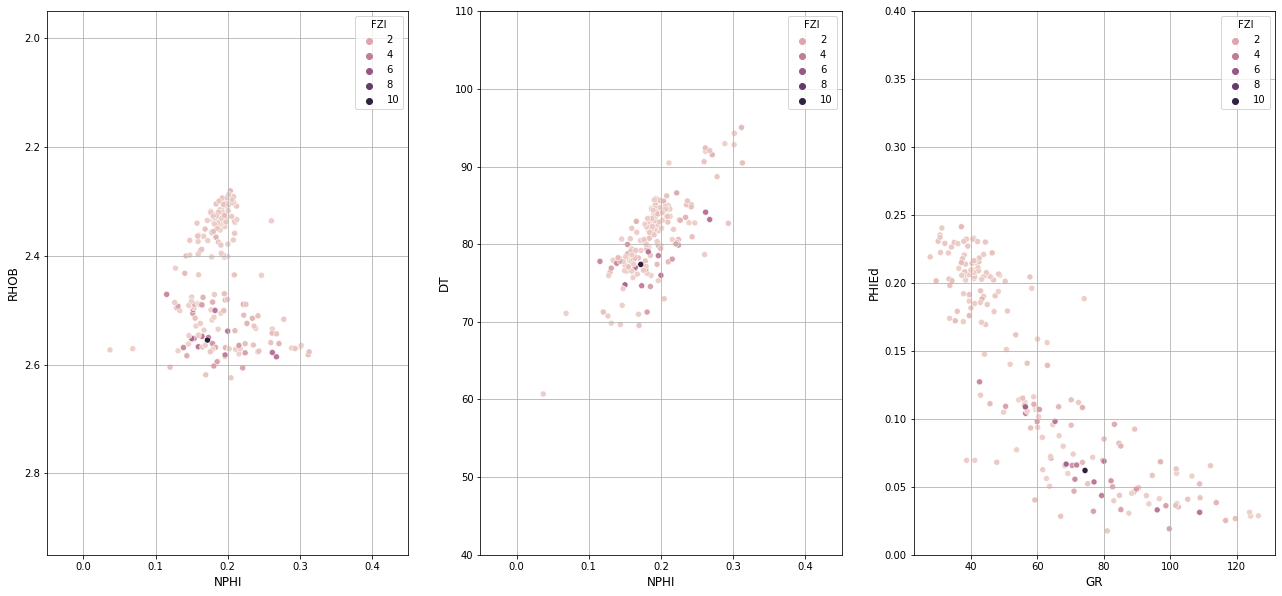

In [ ]:
plt.figure(figsize=(22,10))

plt.subplot(1,3,1)
sns.scatterplot(x=Well_7MGP['NPHI'],y=Well_7MGP['RHOB'],hue=Well_7MGP["FZI"])
plt.subplot(1,3,1).grid()
plt.subplot(1,3,1).set_xlabel("NPHI", fontsize=12)
plt.subplot(1,3,1).set_ylabel("RHOB", fontsize=12)
plt.subplot(1,3,1).set_ylim(2.95,1.95)
plt.subplot(1,3,1).set_xlim(-0.05,0.45)

plt.subplot(1,3,2)
sns.scatterplot(x=Well_7MGP['NPHI'],y=Well_7MGP['DT'],hue=Well_7MGP["FZI"])
plt.subplot(1,3,2).grid()
plt.subplot(1,3,2).set_xlabel("NPHI", fontsize=12)
plt.subplot(1,3,2).set_ylabel("DT", fontsize=12)
plt.subplot(1,3,2).set_ylim(40,110)
plt.subplot(1,3,2).set_xlim(-0.05,0.45)

plt.subplot(1,3,3)
sns.scatterplot(x=Well_7MGP['GR'],y=Well_7MGP['PHIEd'],hue=Well_7MGP["FZI"])
plt.subplot(1,3,3).grid()
plt.subplot(1,3,3).set_xlabel("GR", fontsize=12)
plt.subplot(1,3,3).set_ylabel("PHIEd", fontsize=12)
plt.subplot(1,3,3).set_ylim(0,0.4);
# plt.subplot(1,3,3).set_xlim(1.95,2.95);

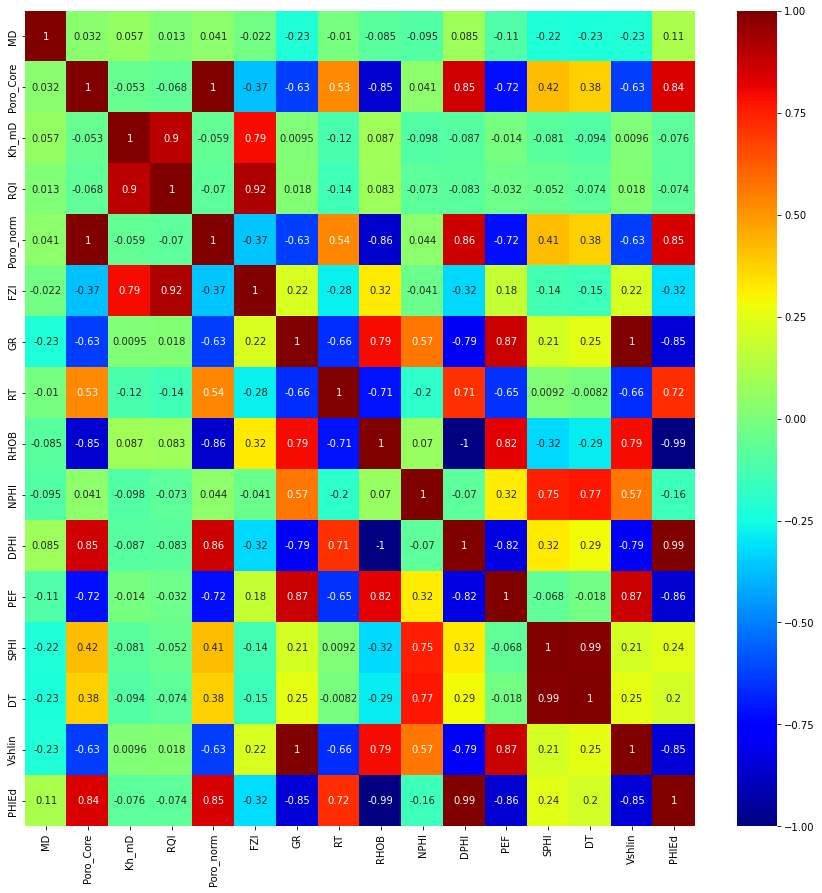

In [ ]:
corrMatrix = Well_7MGP.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corrMatrix, cmap = 'jet', vmin=-1, vmax=1, annot = True)

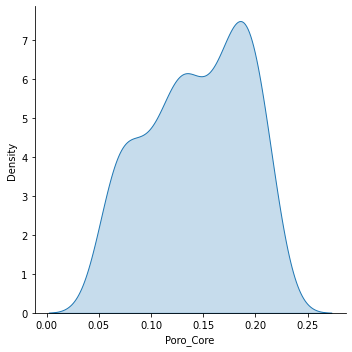

In [ ]:
sns.displot(data=Well_7MGP,x=Well_7MGP["Poro_Core"],kind="kde",fill=True)

In [ ]:
X = Well_7MGP[["Poro_Core"]]

In [ ]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X)
Well_7MGP["Lito"] = kmeans_model.predict(X)

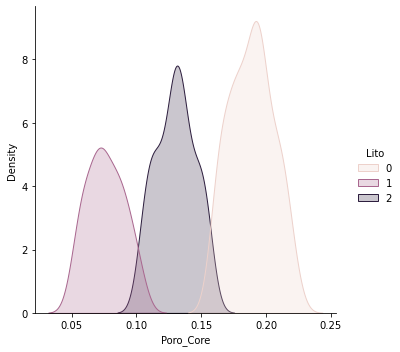

In [ ]:
sns.displot(data=Well_7MGP,x=Well_7MGP["Poro_Core"],kind="kde",fill=True,hue="Lito")

<ipython-input-21-be6ea2b05954>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1).grid()
<ipython-input-21-be6ea2b05954>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1).set_xlabel("NPHI", fontsize=12)
<ipython-input-21-be6ea2b05954>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new in

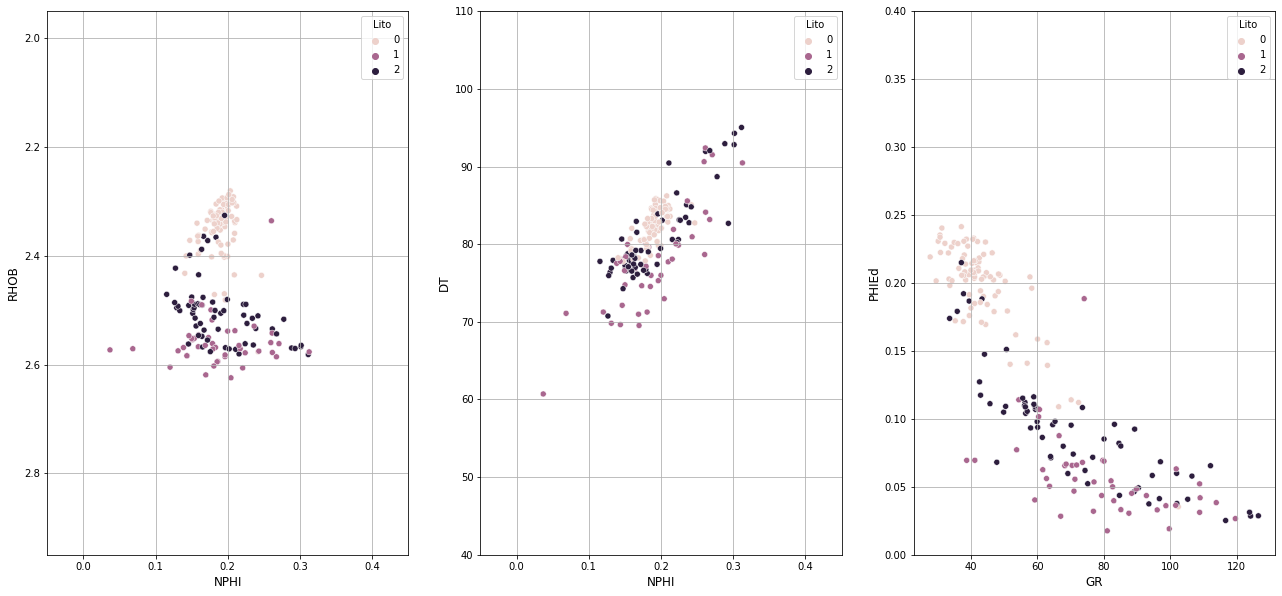

In [ ]:
plt.figure(figsize=(22,10))

plt.subplot(1,3,1)
sns.scatterplot(x=Well_7MGP['NPHI'],y=Well_7MGP['RHOB'],hue=Well_7MGP["Lito"])
plt.subplot(1,3,1).grid()
plt.subplot(1,3,1).set_xlabel("NPHI", fontsize=12)
plt.subplot(1,3,1).set_ylabel("RHOB", fontsize=12)
plt.subplot(1,3,1).set_ylim(2.95,1.95)
plt.subplot(1,3,1).set_xlim(-0.05,0.45)

plt.subplot(1,3,2)
sns.scatterplot(x=Well_7MGP['NPHI'],y=Well_7MGP['DT'],hue=Well_7MGP["Lito"])
plt.subplot(1,3,2).grid()
plt.subplot(1,3,2).set_xlabel("NPHI", fontsize=12)
plt.subplot(1,3,2).set_ylabel("DT", fontsize=12)
plt.subplot(1,3,2).set_ylim(40,110)
plt.subplot(1,3,2).set_xlim(-0.05,0.45)

plt.subplot(1,3,3)
sns.scatterplot(x=Well_7MGP['GR'],y=Well_7MGP['PHIEd'],hue=Well_7MGP["Lito"])
plt.subplot(1,3,3).grid()
plt.subplot(1,3,3).set_xlabel("GR", fontsize=12)
plt.subplot(1,3,3).set_ylabel("PHIEd", fontsize=12)
plt.subplot(1,3,3).set_ylim(0,0.4);
# plt.subplot(1,3,3).set_xlim(1.95,2.95);

In [ ]:
Well_7MGP_Lito1 = Well_7MGP[(Well_7MGP["Lito"]==0)]

In [ ]:
Well_7MGP_Lito1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 21 to 188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MD         86 non-null     float64
 1   Poro_Core  86 non-null     float64
 2   Kh_mD      86 non-null     float64
 3   RQI        86 non-null     float64
 4   Poro_norm  86 non-null     float64
 5   FZI        86 non-null     float64
 6   GR         86 non-null     float64
 7   RT         86 non-null     float64
 8   RHOB       86 non-null     float64
 9   NPHI       86 non-null     float64
 10  DPHI       86 non-null     float64
 11  PEF        86 non-null     float64
 12  SPHI       86 non-null     float64
 13  DT         86 non-null     float64
 14  Vshlin     86 non-null     float64
 15  PHIEd      86 non-null     float64
 16  Lito       86 non-null     int32  
dtypes: float64(16), int32(1)
memory usage: 11.8 KB


<ipython-input-24-851b54962c7f>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1).set_title("7-MPG-40D-BA Arena",fontsize=16)
<ipython-input-24-851b54962c7f>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1).set_xlabel("Log Porosidad Normalizada", fontsize=12, fontweight="bold")
<ipython-input-24-851b54962c7f>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previo

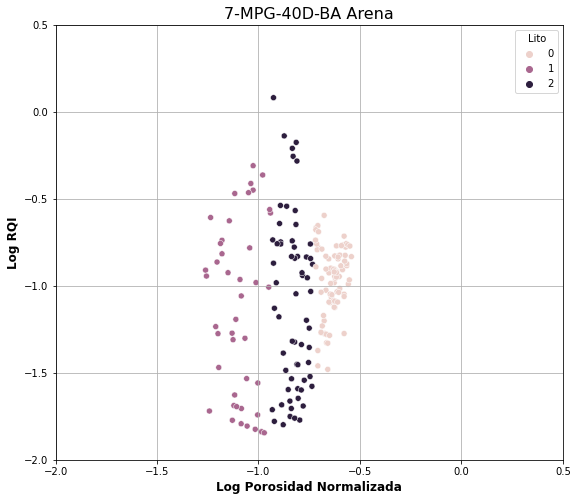

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.scatterplot(x=np.log10(Well_7MGP["Poro_norm"]),y=np.log10(Well_7MGP["RQI"]),hue=Well_7MGP["Lito"])
plt.subplot(1,2,1).set_title("7-MPG-40D-BA Arena",fontsize=16)
plt.subplot(1,2,1).set_xlabel("Log Porosidad Normalizada", fontsize=12, fontweight="bold")
plt.subplot(1,2,1).set_ylabel("Log RQI", fontsize=12,fontweight="bold")
plt.subplot(1,2,1).set_ylim(-2,0.5)
plt.subplot(1,2,1).set_xlim(-2,0.5)
plt.subplot(1,2,1).grid()

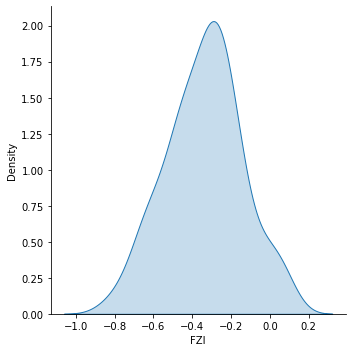

In [ ]:
sns.displot(data=np.log10(Well_7MGP_Lito1["FZI"]),kind="kde",fill=True)

In [ ]:
kmeans_model = KMeans(n_clusters=7, random_state=42)
kmeans_model.fit(X)
core_POJ["Kmeans"] = kmeans_model.predict(X)

ValueError: ignored

In [ ]:
X_lito1 = Well_7MGP_Lito1[["GR","RHOB","NPHI","PEF"]]
y_lito1 = Well_7MGP_Lito1["FZI"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lito1, y_lito1, test_size = 0.2, random_state = 0)

#Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gbrt = GradientBoostingRegressor(max_depth=2,n_estimators=200)
gbrt.fit(X_train,y_train)

errores = [mean_squared_error(y_test,y_pred) for y_pred in gbrt.staged_predict(X_test)]
mejor = np.argmin(errores)
mejor

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=4,n_estimators=5,learning_rate=0.5)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_xgb)